In [1]:
import numpy as np

In [17]:
x = np.array([[10,11,12,13,14]])

In [18]:
y = np.array([[1,2,3,4,5]])

In [19]:
print(x.shape)
print(y.shape)

(1, 5)
(1, 5)


In [20]:
print(f"더하기: {x+y}")
print(f"빼기: {x-y}")

더하기: [[11 13 15 17 19]]
빼기: [[9 9 9 9 9]]


In [21]:
x*y

array([[10, 22, 36, 52, 70]])

In [25]:
x.T@y

array([[10, 20, 30, 40, 50],
       [11, 22, 33, 44, 55],
       [12, 24, 36, 48, 60],
       [13, 26, 39, 52, 65],
       [14, 28, 42, 56, 70]])

In [26]:
x@y.T

array([[190]])

In [27]:
z = np.array(10)

In [31]:
print(x+z)
print(x-z)
print(x*z)
print(x/z)

[[20 21 22 23 24]]
[[0 1 2 3 4]]
[[100 110 120 130 140]]
[[1.  1.1 1.2 1.3 1.4]]


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
img = cv2.imread("cat.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[:, :,::-1]

a = list([[1,2,3,4],[5,6,7,8]])
print(a[1][0])
a_np = np.array(a)
print(a_np[1,0])

5
5


In [4]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(162, 310, 3)


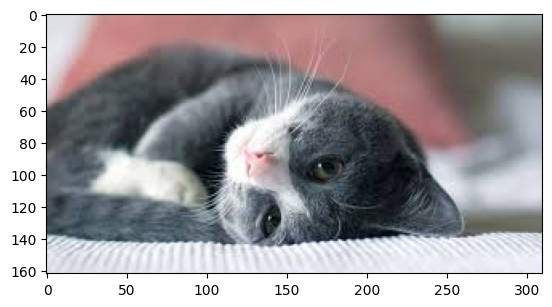

In [14]:
plt.imshow(img)
plt.show()

In [17]:
np.save("np_cat.npy", img)

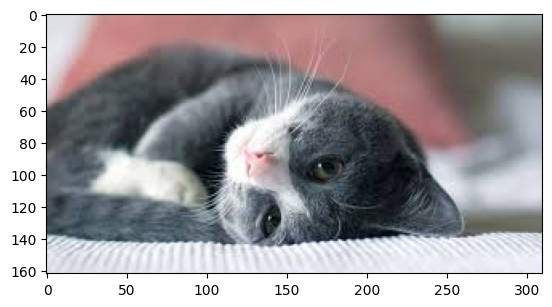

In [21]:
img2 = np.load("np_cat.npy")
plt.imshow(img2)
plt.show()

In [24]:
img2.shape
print(img2.dtype)
# 162*310*3*1byte 용량

uint8


150660

In [35]:
resize_img = cv2.resize(img2, (224, 224))

In [36]:
print(resize_img.shape)

(224, 224, 3)


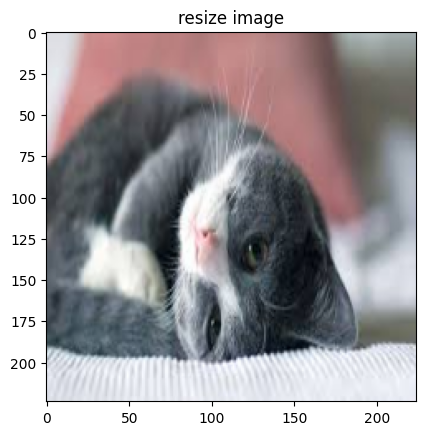

In [37]:
plt.imshow(resize_img)
plt.title("resize image")
plt.show()

In [42]:
cv2.imwrite("resize_img.png", resize_img[:,:,::-1])

True

In [43]:
a = np.ones((2,5))
print(a)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [45]:
pad_a = np.pad(a, ((1,1), (1,1)), 'constant', constant_values=0)
print(pad_a)
print(a.shape, pad_a.shape)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
(2, 5) (4, 7)


In [47]:
pad_a = np.pad(a, ((3,1), (1,1)), 'constant', constant_values=0)
print(pad_a)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [48]:
print(img2.shape)
h, w, c = img2.shape

# 필요한 크기 => w-h
# 이만큼 패드를 먹이기

(162, 310, 3)


In [51]:
# 이미지 처럼 3차원 패드는
b = np.ones((10,10,3))
pad_b = np.pad(b, ((1,1),(2,1),(0,0)), 'constant', constant_values=0)
print(b.shape, pad_b.shape)

(10, 10, 3) (12, 13, 3)


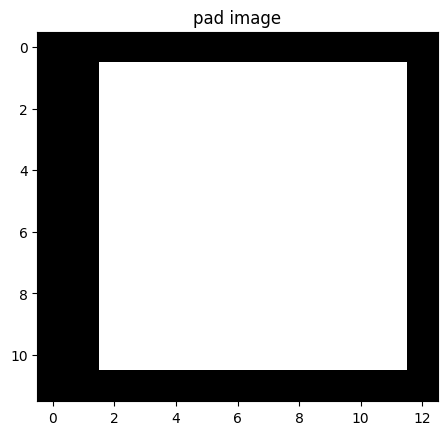

In [52]:
plt.imshow(pad_b)
plt.title("pad image")
plt.show()

In [53]:
def resize_224x224(img):
    # 패딩할 상하/좌우 픽셀
    # 상하나 좌우 중 한 세트에만 패딩을 할 예정 -> 초기 값: 0 
    # 상하좌우 모두 패딩을 하고 싶다면
    # 0이 아닌 같은 값으로 넣은 후 
    # 이후 ud, lr 값을 업데이트할 때,
    # += 로 값을 더해주는 형식으로 하면 됨.
    ud, lr = (0, 0), (0, 0)
    
    # 이미지의 높이, 너비 중의 더 큰 값
    M = max(img.shape[:2])
    
    # s = 이미지의 높이와 너비의 차
    s = img.shape[0]-img.shape[1]
    
    # 높이가 너비보다 더 긴 경우(s>0)
    # -> 좌우로 s의 절반씩 패딩
    if M == img.shape[0]:
        lr = (s//2, s//2 + s%2) 
        # s%2는 s가 홀수 인 경우 나머지인 1을 더해주는 역할
        
    # 너비가 높이보다 더 길거나 같은 경우(s<=0)
    #-> 상하로 s의 절반씩 패딩
    else:
        ud = (-s//2, -s//2 + s%2)
    
    # 위에서 구한 값으로 패딩 
    # 3차원에 있는 BGR 정보에 대해서는 패딩 안 함 
    # 하지만 (0,0)으로 값을 지정을 해야, Error가 안 생김
    padded_img = np.pad(img, (ud, lr, (0, 0)))
    
    # 224x224 크기로 resize한 이미지 반환
    resized_img = cv2.resize(padded_img, (224, 224))
    
    return resized_img

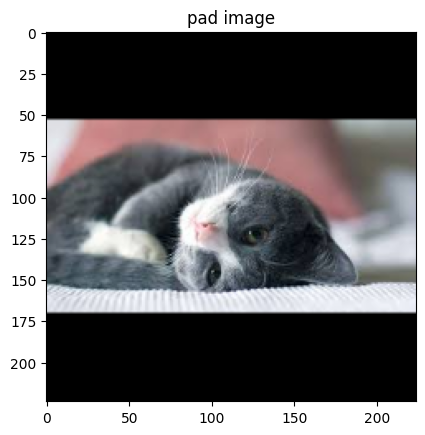

In [55]:
pad_resize_img = resize_224x224(img2)
plt.imshow(pad_resize_img)
plt.title("pad image")
plt.show()

In [58]:
print(type(img2))
print(img2.shape)
h, w, c = img2.shape

<class 'numpy.ndarray'>
(162, 310, 3)


In [67]:
zeros = np.zeros((310,310,3), dtype=np.uint8)
h=((310-162)//2)
print(h)
zeros[h:310-h,:,:] = img2

74


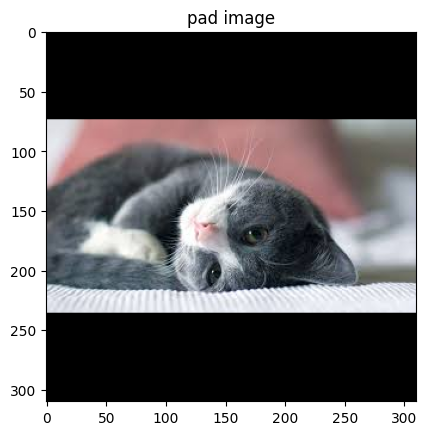

In [68]:
plt.imshow(zeros)
plt.title("pad image")
plt.show()

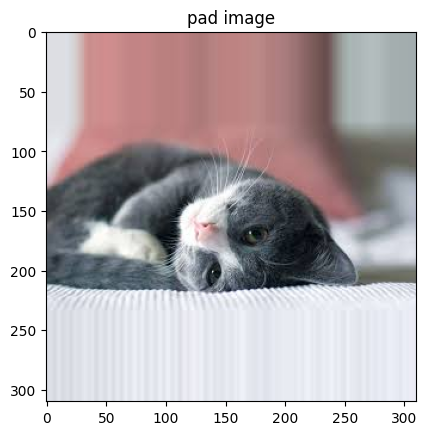

In [70]:
dif = 310-162
cv_pad_img = cv2.copyMakeBorder(img2, dif//2, dif//2, 0,0, cv2.BORDER_REPLICATE, (0,0,0))

plt.imshow(cv_pad_img)
plt.title("pad image")
plt.show()

(162, 310, 3)


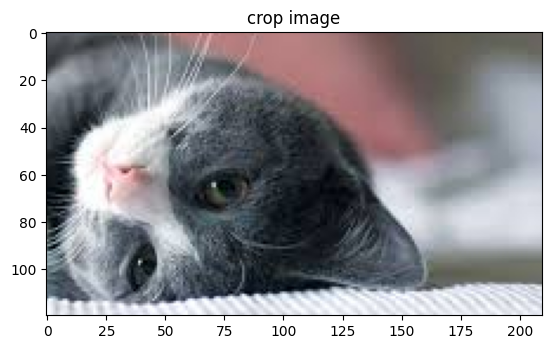

In [74]:
print(img.shape)
crop_img = img[30:150,100:310,:]

plt.imshow(crop_img)
plt.title("crop image")
plt.show()

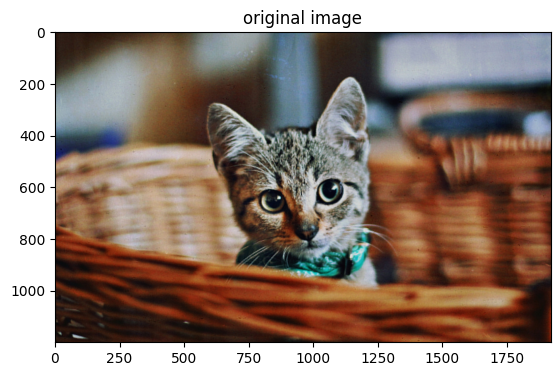

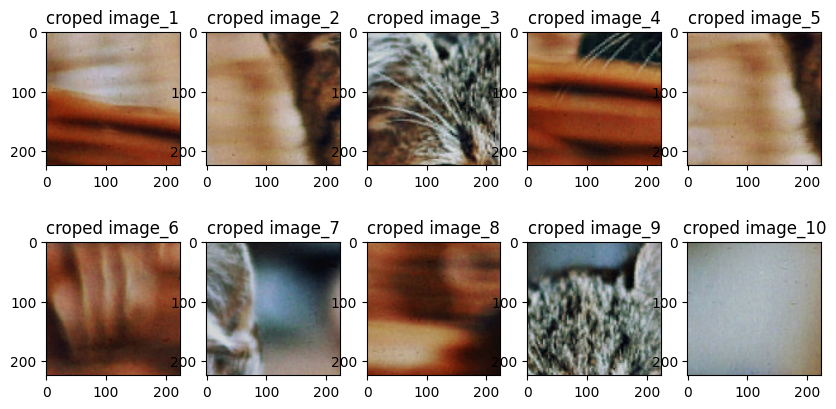

In [79]:
from matplotlib import pyplot as plt
import numpy as np
import random
import cv2

org_img = cv2.imread("big_cat.jpg")[:,:,::-1]
plt.imshow(org_img)
plt.title(f"original image")
plt.show()

def cropping(img, resize=310):
    n1, n2 = img.shape[:2]
    plt.figure(figsize=(10,5))
    for i in range(10):
        # n11, n22: 가로, 세로의 crop할 시작점 
        n11 = random.randint(0, n1-224)
        n22 = random.randint(0, n2-224)
        
        # 시작점부터 가로, 세로가 224만큼 되도록 crop
        crop_img = img[n11:n11+224,n22:n22+224,:]

        # 10개의 이미지를 2행 5열로 나열
        plt.subplot(2,5,i+1)
        plt.imshow(crop_img)
        plt.title(f"croped image_{i+1}")
    plt.show()

cropping(org_img)

1200 1920
240 384 1200
10 151
(224, 224, 3)


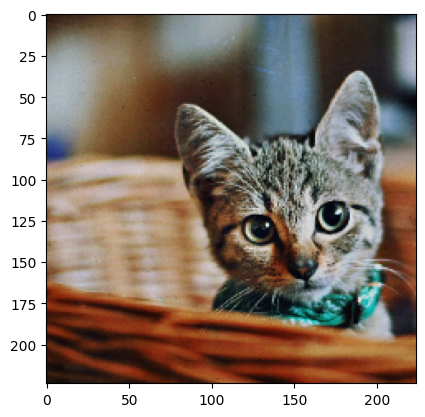

In [102]:
timg = cv2.imread('big_cat.jpg')[:,:,::-1]
 
h, w = timg.shape[:2]
print(h, w)

r = min(h,w)
h = int(h/(r // 224))
w = int(w/(r // 224))

print(h, w, r)
resize_img = cv2.resize(timg,(w, h))
 
height = random.randrange(0,resize_img.shape[0]-224)
width = random.randrange(0,resize_img.shape[1]-224)
print(height, width)
if (width - 112) <= 0:
    w1 = 0
    w2 = 224
else:
    w1 = width - 112
    w2 = width + 112
if (height - 112) <= 0:
    h1 = 0
    h2 = 224
else:
    h1 = height - 112
    h2 = height + 112
crop_img2 = resize_img[h1:h2,w1:w2,:]
 
print(crop_img2.shape)
plt.imshow(crop_img2)
plt.show()

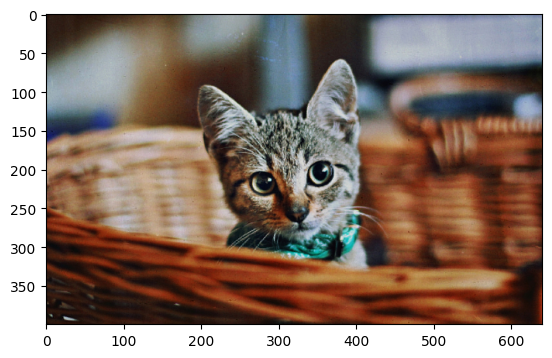

crop 사이즈:224
1 번째 crop 위치:
H:147
W:271

2 번째 crop 위치:
H:166
W:372

3 번째 crop 위치:
H:117
W:368

4 번째 crop 위치:
H:102
W:195

5 번째 crop 위치:
H:121
W:217

6 번째 crop 위치:
H:148
W:406

7 번째 crop 위치:
H:128
W:200

8 번째 crop 위치:
H:59
W:221

9 번째 crop 위치:
H:31
W:214

10 번째 crop 위치:
H:33
W:230



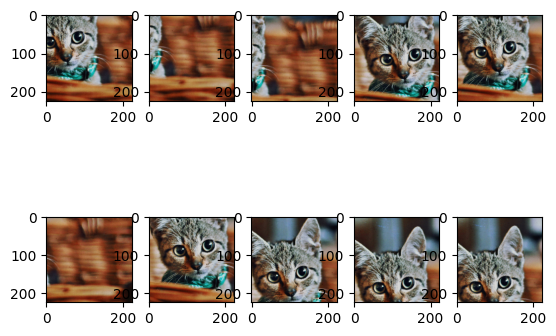

In [104]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# big_cat 사진 불러오기
big_cat = cv2.imread("big_cat.jpg")
big_cat = cv2.cvtColor(big_cat, cv2.COLOR_BGR2RGB)

# 33% 비율 적용을 위해 3로 나눔
s1 = big_cat.shape[1]//3
s2 = big_cat.shape[0]//3

# 3으로 나눈 크기로 resize(640x400)
re_big_cat = cv2.resize(big_cat, (s1, s2))
plt.imshow(re_big_cat)
plt.show() 

# crop size
crop_size = 224
print(f"crop 사이즈:{crop_size}")
for i in range(0, 10, 1):

    crop_H = random.randrange(0,(re_big_cat.shape[0]+1)-crop_size)
    crop_W = random.randrange(0,(re_big_cat.shape[1]+1)-crop_size)

    print(f"{i+1} 번째 crop 위치:\nH:{crop_H}\nW:{crop_W}\n")

    crop_img = re_big_cat[crop_H:crop_H+crop_size, crop_W:crop_W+crop_size,:]
    plt.subplot(2,5,i+1)
    plt.imshow(crop_img)
plt.show()